In [8]:
import lightkurve as lk
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
def search_result(name):
    search_result = lk.search_lightcurve(name, author = 'SPOC', cadence = 120)
    return search_result

In [10]:
def plot_all_sectors(search_result):
    for i in range(len(search_result)):
        lc = search_result[i].download()
#         lc.normalize().scatter()

        pg = lc.to_periodogram(maximum_period=30)
        pg.plot(view='period', title = '$' + 'Sector: ' + str(lc.sector)+ '$')

#         print('Period in Sector', lc.sector,':', pg.period_at_max_power)

        # Create a model light curve for the highest peak in the periodogram
        lc_model = pg.model(time=lc.time, frequency=pg.frequency_at_max_power)
        ax = lc.normalize().scatter()
        lc_model.scatter(ax=ax, lw=3, ls='--', c='red', label = '$' + 'Sector: ' + str(lc.sector)+ '$')


In [11]:
def all_per(search):
    periods = []
    avg = 0
    std = 0

    for i in range(len(search)):
        lc = search[i].download()
        pg = lc.to_periodogram(maximum_period=30)
        per = pg.period_at_max_power.value
        print('Period in Sector', lc.sector,':', per)
        periods.append(per)
    std = np.std(periods)
    avg = np.average(periods)
    print('The avgerage is', avg, 'with a std of ', std)
        

In [12]:
name = 'TIC 47346402'  
search = search_result(name)
search

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 43,2021,SPOC,120,47346402,0.0
1,TESS Sector 44,2021,SPOC,120,47346402,0.0
2,TESS Sector 45,2021,SPOC,120,47346402,0.0


In [13]:
all_per(search)

Period in Sector 43 : 3.6839252750187836
Period in Sector 44 : 3.784570327162578
Period in Sector 45 : 3.586361063412114
The avgerage is 3.684952221864492 with a std of  0.08092185128873075


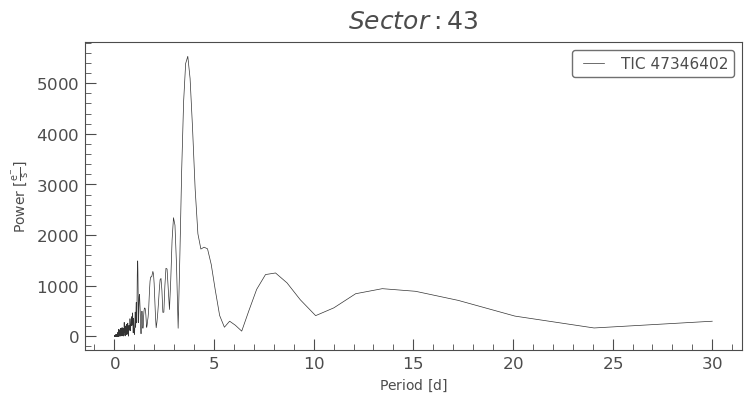

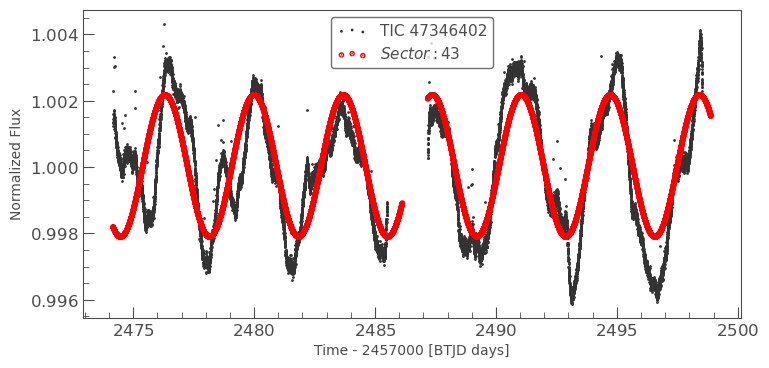

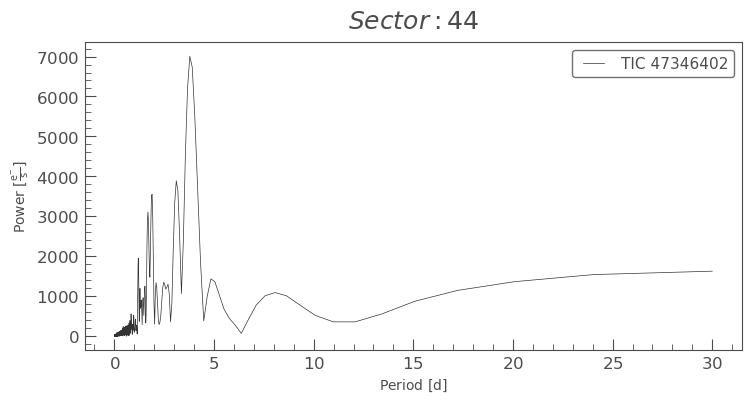

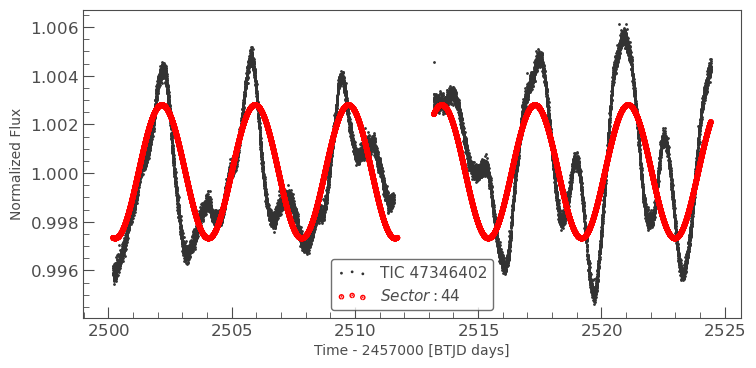

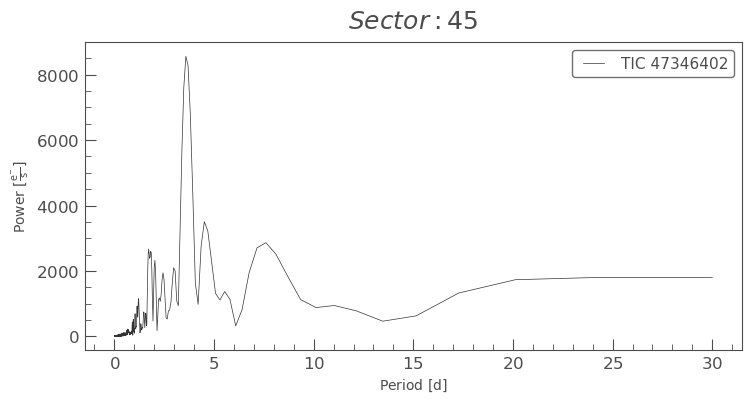

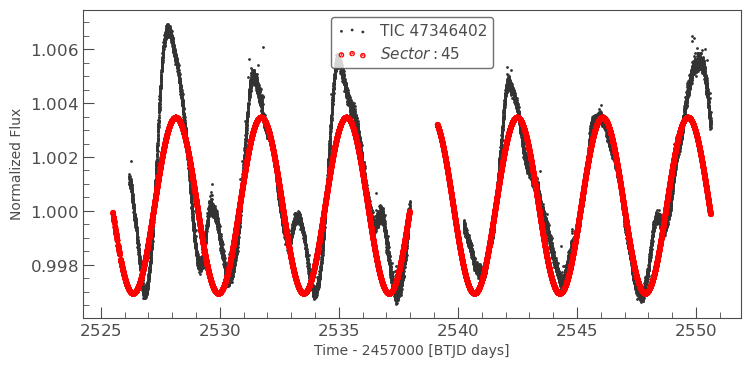

In [14]:
plot_all_sectors(search)

In [36]:
latest_sec = search[len(search)-1].download()
latest_sec = latest_sec.sector
tpf = lk.search_targetpixelfile(name, sector = latest_sec, cadence=120).download()
# tpf = lk.search_targetpixelfile('TIC 166646191', sector =22, cadence = 120).download()

In [37]:
tpf.interact_sky(aperture_mask='default')

In [10]:
tpf.interact()

C:\Users\ciarrac\AppData\Local\Temp\ipykernel_2352\3721101869.py:28: LightkurveDeprecationWarning: The hdu function is deprecated and may be removed in a future version.
        Use fits.open(lc.filename) instead.
  plt.vlines(tpf.time.value[np.bitwise_and(lc.hdu[1].data['QUALITY'],32) == 32], ymin=0, ymax=2, color = 'mediumseagreen', label = 'Momentum Dumps')


<Figure size 2000x1000 with 0 Axes>

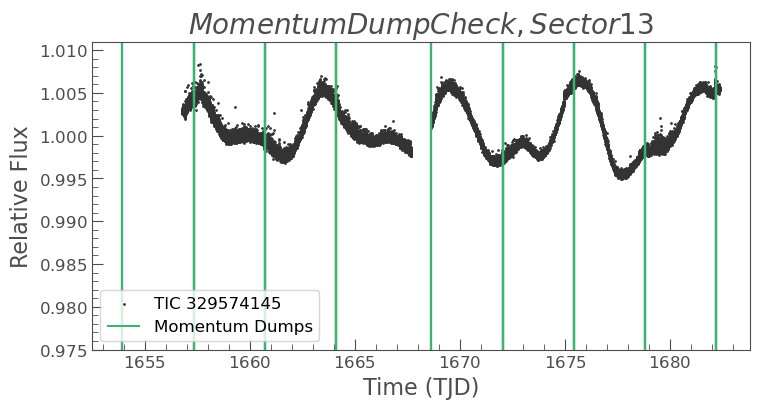

C:\Users\ciarrac\AppData\Local\Temp\ipykernel_2352\3721101869.py:28: LightkurveDeprecationWarning: The hdu function is deprecated and may be removed in a future version.
        Use fits.open(lc.filename) instead.
  plt.vlines(tpf.time.value[np.bitwise_and(lc.hdu[1].data['QUALITY'],32) == 32], ymin=0, ymax=2, color = 'mediumseagreen', label = 'Momentum Dumps')


<Figure size 2000x1000 with 0 Axes>

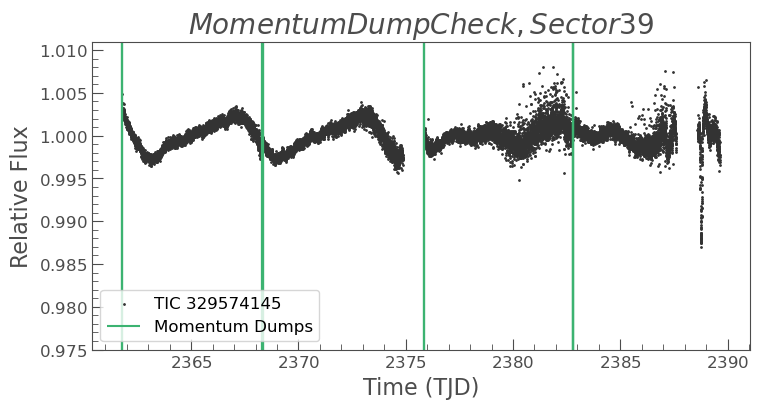

In [32]:
TIC = name
sectors = []
for i in range(len(search)):
    sector_num = str(search[i].mission)
    sector_num = sector_num.split(' ')[2]
    sector_num = int(sector_num[:2])
    sectors.append(sector_num)


for i in sectors:
#     lc = lk.search_lightcurve(TIC, mission='TESS',sector = i, author = 'SPOC' ).download(quality_bitmask = 'none')
    tpf = lk.search_targetpixelfile(TIC, mission='TESS',sector = i, author = 'SPOC', cadence = 120 ).download(quality_bitmask = 'none')
    
    plt.figure(figsize=(20,10))
    
    # plot transits
#     plt.vlines(b_transits, ymin=0, ymax=2, color = 'hotpink', label = 'Planet b')
#     plt.vlines(c_transits, ymin=0, ymax=2, color = 'dodgerblue', label = 'Planet c')
#     plt.vlines(d_transits, ymin=0, ymax=2, color = 'orchid', label = 'Planet d')

    lc = lk.search_lightcurve(TIC, mission='TESS',sector = i, author = 'SPOC', cadence = 120 ).download(quality_bitmask = 'hard')
    #tpf = lk.search_targetpixelfile(TIC,mission='TESS',sector = i, author = 'SPOC').download(quality_bitmask='hard')
    #np.bitwise_and(tpf.hdu[1].data['QUALITY'],32) == 32
    lc.normalize().scatter()
#     lc = lk.search_lightcurve(aperture_mask = tpf.pipeline_mask).normalize()#.remove_outliers(sigma=4)#.flatten()
#     plt.scatter(lc.time.value, lc.flux,s=1,c='k')

    plt.vlines(tpf.time.value[np.bitwise_and(lc.hdu[1].data['QUALITY'],32) == 32], ymin=0, ymax=2, color = 'mediumseagreen', label = 'Momentum Dumps')
    plt.ylim(0.975,1.011)
#     plt.xlim(int(np.min(lc.time.value))-.2, int(np.max(lc.time.value))+.2)
#     plt.ylim(int(np.min(lc.flux.value))-.002, int(np.max(lc.flux.value))+.002)

    plt.xlabel('Time (TJD)',fontsize = 16)
    plt.ylabel('Relative Flux', fontsize = 16)
    plt.title('$'+'Momentum Dump  Check,  Sector  '+ str(i) + '$', fontsize = 20)
    plt.legend(loc='best', fontsize = 12)

    plt.show()

# Misc.

In [12]:
# name ='TIC 441709021'
# search = lk.search_lightcurve(name, author = 'SPOC')
# search

In [13]:
# def make_plots_2(search_result, num):
#     tot = search_result.download_all()
#     lc = tot[num]
#     lc.scatter()
    
#     pg = lc.to_periodogram(maximum_period=350)
#     pg.plot(view='period', title = 'Periodogram')
    
#     print('Period:', pg.period_at_max_power)
    
#     # Create a model light curve for the highest peak in the periodogram
#     lc_model = pg.model(time=lc.time, frequency=pg.frequency_at_max_power)
#     ax = lc.normalize().plot()
#     lc_model.plot(ax=ax, lw=3, ls='--', c='red')


In [14]:
tpf = lk.search_targetpixelfile('TIC 231005905', mission='TESS',sector = i, author = 'SPOC' ).download(quality_bitmask = 'none')
tpf.time.value   

No data found for target "TIC 231005905".
ERROR:lightkurve.search:No data found for target "TIC 231005905".
C:\Users\ciarrac\Ana\lib\site-packages\lightkurve\search.py:409: LightkurveWarning: Cannot download from an empty search result.
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'time'

In [ ]:
lc = tpf.to_lightcurve(aperture_mask = tpf.pipeline_mask).normalize()#.remove_outliers(sigma=4)#.flatten()
type((np.min(lc.flux.value)))

In [ ]:
# print(name)
# make_plots_2(search, 8)

In [ ]:
# for i in range(len(search)):
#     print('Sector', i)
#     make_plots(search[i])

In [ ]:
# for i in range(2):
#     name = get_HD_name(i)
#     search = search_result(name)
#     plots = make_plots(search)

In [ ]:
# path = os.getcwd()
# path_ExEP = path + '\\HWO ExEP Precursor Science Stars.csv'

In [ ]:
ExEP_withLinks = pd.read_csv(path_ExEP, skiprows=61)
#ExEP = ExEP_withLinks[ExEP_withLinks.columns[1:]]
#ExEP

In [ ]:
# tics = []
# for i in range(len(ExEP_withLinks)):
#     x = ExEP_withLinks['tic_id'][i].strip('<a href="https://exoplanetarchive.ipac.caltech.edu/overview/')
#     t = x.split('"')[0]
#     tics.append(t)

# # tics